In [1]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.var_feedforward import build_var_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.greed_optimize import greed_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random
import cPickle

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 820M (CNMeM is disabled, cuDNN not available)


In [2]:
import gc
print 'load'

with open('./data/results_var_mad.pckl', 'rb') as inp:
    mad = cPickle.load(inp)
    mad = [[m[1] for m in b.history] for b in mad]
    
gc.collect()
print 'load'
with open('./data/results_var_random.pckl', 'rb') as inp:
    rand = cPickle.load(inp)   

rand = [[m[1] for m in b.history] for b in rand]
    
gc.collect()
print 'load'
with open('./data/results_var_greed.pckl', 'rb') as inp:
    greed = cPickle.load(inp)
    greed =  [[m[1] for m in b.history] for b in greed]
    
gc.collect()
print 'load'
with open('./data/results_var_hoag.pckl', 'rb') as inp:
    hoag = cPickle.load(inp)
    hoag =  [[m[1] for m in b.history] for b in hoag]
    

#for i in xrange(5):
#    greed[i].history = [rand[i].history[0]]+ greed[i].history
#X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
#Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')



load
load
load
load


In [3]:
with open('./acc_results_var_mad.pckl', 'rb') as inp:
    amad = cPickle.load(inp)
with open('./acc_results_var_random.pckl', 'rb') as inp:
    arand = cPickle.load(inp)    
with open('./acc_results_var_greed.pckl', 'rb') as inp:
    agreed = cPickle.load(inp)
with open('./acc_results_var_hoag.pckl', 'rb') as inp:
    ahoag = cPickle.load(inp)

#X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
#Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')



DrMAD
[ 0.018496  0.018328  0.018508  0.018484  0.018504  0.018452  0.018452]
Случайный поиск
[ 0.018484  0.01854   0.01854   0.01838   0.01858   0.01858 ]
Жадный алгоритм
[ 0.018352  0.023156  0.022268  0.022624  0.022956  0.023084  0.023084]
HOAG
[ 0.018648  0.018332  0.018472  0.018656  0.019204  0.019204]


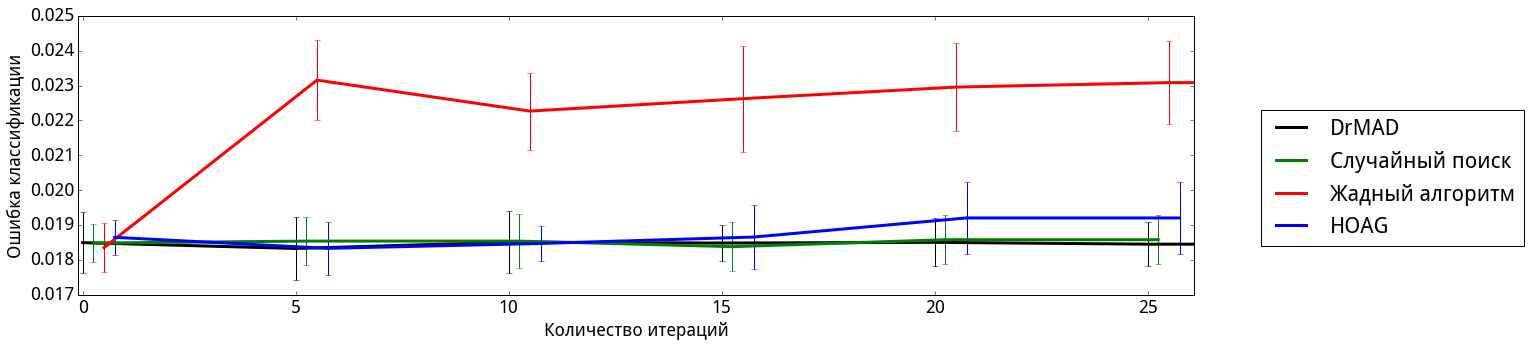

In [5]:
#amad
#arand
#ahoag
id = -1
font = {'family': 'Droid Sans',
        'weight': 'normal',
       'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)
plt.xlabel(u'Количество итераций', fontsize=18)
plt.ylabel(u'Ошибка классификации', fontsize=18)


for dataset, label, c in [(amad, 'DrMAD', 'k'), 
                         (arand, u'Случайный поиск', 'g'),
                         (agreed, u'Жадный алгоритм', 'r'),
                         (ahoag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    print label
    for b in dataset:
        b = b+[b[-1]]
        
            
        
        line.append(b)
    #line = line[:2]
   
    print np.mean(line, axis=0)
   
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    #print 'std', np.std(line, axis=0)
    plt.errorbar(np.array(range(len(line[0])))*5+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))*5+id*1.0/4, np.mean(line, axis=0),  c=c, lw=3, label=label)
    #plt.plot( np.mean(line, axis=0), label=label, c=c, lw=3)
#plt.ylim((-1000000, -1160000))
plt.xlim((-0.1,26.1))
plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,0.7))


In [6]:
#plt.matshow(matrix.T)
for dataset, label, c in [(mad, 'MrMAD', 'w'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                        ]:
    first = True
    for i in dataset:
        first_value = i.history[0][0][0]
        i = i.best_values[0]
        
        first_value = np.log10(np.exp(2*first_value))*10
        i = np.log10(np.exp(2*i))*10
        if first:
            plt.scatter(i[0] + np.random.randn(1)*0.1,i[1]+ np.random.randn(1)*0.1, c=c, label=label, alpha=0.5, s=100)
            first = False
        else:
            plt.scatter(i[0]+ np.random.randn(1)*0.1,i[1]+ np.random.randn(1)*0.1, c=c, alpha=0.5, s=100)
        #print [first_value[0], i[0]],[first_value[1], i[1]]
        plt.plot([first_value[0], i[0]],[first_value[1], i[1]])
        
plt.legend(loc='best')
plt.xlim((-0.1,26.1))
plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,0.7))
#plt.scatter(2713%100 ,2713/100, s=1000)


AttributeError: 'list' object has no attribute 'history'

In [9]:
agreed


[[0.018800000000000001,
  0.022599999999999999,
  0.025000000000000001,
  0.0246,
  0.0212,
  0.023900000000000001],
 [0.018499999999999999,
  0.023400000000000001,
  0.023300000000000001,
  0.024,
  0.022100000000000002,
  0.024400000000000002],
 [0.017600000000000001,
  0.0235,
  0.0247,
  0.022100000000000002,
  0.022200000000000001,
  0.0235],
 [0.0189,
  0.022599999999999999,
  0.023800000000000002,
  0.022800000000000001,
  0.023800000000000002,
  0.021399999999999999],
 [0.0167,
  0.024299999999999999,
  0.0218,
  0.020500000000000001,
  0.021600000000000001,
  0.024]]

DrMAD
DrMAD
DrMAD
DrMAD
DrMAD
DrMAD -1305432.92355
27
Случайный поиск
Случайный поиск
Случайный поиск
Случайный поиск
Случайный поиск
Случайный поиск -1304556.4963
26
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм -11136.2360352
27
HOAG
HOAG
HOAG
HOAG
HOAG
HOAG -280061.619971
26


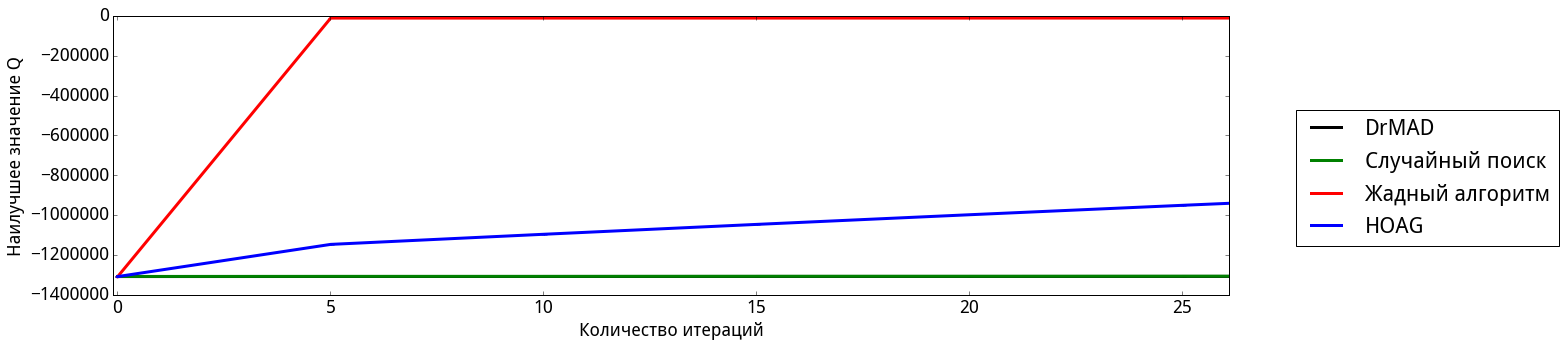

In [7]:
font = {'family': 'Droid Sans',
        'weight': 'normal',
       'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)
plt.xlabel(u'Количество итераций', fontsize=18)
plt.ylabel(u'Наилучшее значение Q', fontsize=18)


for dataset, label, c in [(mad, 'DrMAD', 'k'), 
                         (rand, u'Случайный поиск', 'g'),
                         (greed, u'Жадный алгоритм', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    for b in dataset:
        b = b +[b[-1]]
        
        print label
        
        history = []
        for i in xrange(0, len(b)):
        
            best_value = max([h for h in b[:i+1]])
            
            history.append(best_value)
        line.append(history)
    print label,  np.mean(np.array(line)[:,-1])
    print len(np.mean(line, axis=0))
    #print np.mean(line, axis=0)[-1]
    
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    plt.errorbar(np.array(range(len(line[0])))*5+id*1.0/1000, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))*5+id*1.0/1000, np.mean(line, axis=0),  c=c, lw=3, label=label)
    #plt.plot( np.mean(line, axis=0), label=label, c=c, lw=3)
#plt.ylim((-1000000, -1160000))
plt.xlim((-0.1,26.1))
plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,0.7))


In [9]:
mad

[[array(-1308568.9929199219),
  array(-905046.8741455078),
  array(-700982.91796875),
  array(-523316.35314941406),
  array(-372240.7655029297),
  array(-247516.45922851562),
  array(-150172.32885742188),
  array(-79565.20458984375),
  array(-35701.669921875),
  array(-16367.4033203125),
  array(-12229.8720703125),
  array(-11958.6669921875),
  array(-12319.5732421875),
  array(-12124.96728515625),
  array(-12053.314453125),
  array(-12147.09765625),
  array(-11929.9345703125),
  array(-11995.92236328125),
  array(-11946.96337890625),
  array(-11927.41064453125),
  array(-11986.234375),
  array(-12103.11865234375),
  array(-12142.87109375),
  array(-12047.3974609375),
  array(-12027.23681640625),
  array(-11772.98828125)],
 [array(-1308363.514831543),
  array(-903745.3236694336),
  array(-699550.1385498047),
  array(-522006.7490234375),
  array(-371011.43017578125),
  array(-246686.92163085938),
  array(-149793.26293945312),
  array(-79498.87280273438),
  array(-35825.619140625),
  arr

In [12]:
import theano.tensor as T
param_num = X_train.shape[1] * 10 + 10 + 10  + 1
accs = {}
Q = {}
lr = theano.shared(10**(-6))
alphas = theano.shared(np.array([1.0]*param_num))
optimizer = partial(gd_optimizer, learning_rate=lr)
inits = [np.sqrt(2.0/(X_train.shape[1] )).astype(theano.config.floatX), np.sqrt(2.0/(10 )).astype(theano.config.floatX)]

model_build = partial(build_var_feedforward,  structure = [X_train.shape[1],10, 1],
                      init_sigmas=inits, nonlinearity=lambda x:T.nnet.relu(x), log_alphas =alphas, 
                      param_pool_size=25, bias=True)


training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=25 )



X_t = T.matrix()

predicts = []

for m in training_procedure.models:    
    predict = m.predict_var(X_t)
    predicts.append(theano.function([X_t], predict))
print 'start'
id = -1
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []
    Q[label] = []
    accs[label] = []

    for b in dataset[::-1]:
        print 'start'
        
        Q[label].append([])
        accs[label].append([])
        history = []
        if len(b.history)==50:
            b.history = b.history+[b.history[-1]]
        
        for i in xrange(0, len(b.history), 10):
            
            best_value = np.argmax([h[1] for h in b.history[:i+1]])
            #print best_value
            best_value = b.history[best_value][0]
            #best_value = [np.array([6.0]*param_num)]
            
            # if i==len(b.history)-1:
            #     print best_value[0]
            for m in training_procedure.models:
                m.respawn()

            alphas.set_value(best_value[0])
            for _ in xrange(5000):
                training_procedure.do_train()
            #alphas.set_value(np.array([1.0, 1.0]))
         


            score = training_procedure.do_validation()
            res = []
            res = np.sqrt(np.mean((predicts[0](X_test)[:,0]-Y_test)**2))
            res2 = np.sqrt(np.mean((predicts[0](X_train)[:,0]-Y_train)**2))
            
            accs[label][-1].append((res,res2))
            Q[label][-1].append(score)
            print i,res,res2,score

KeyboardInterrupt: 

In [4]:
with open('var_results.pckl','wb') as out:
  cPickle.dump((Q,accs), out)

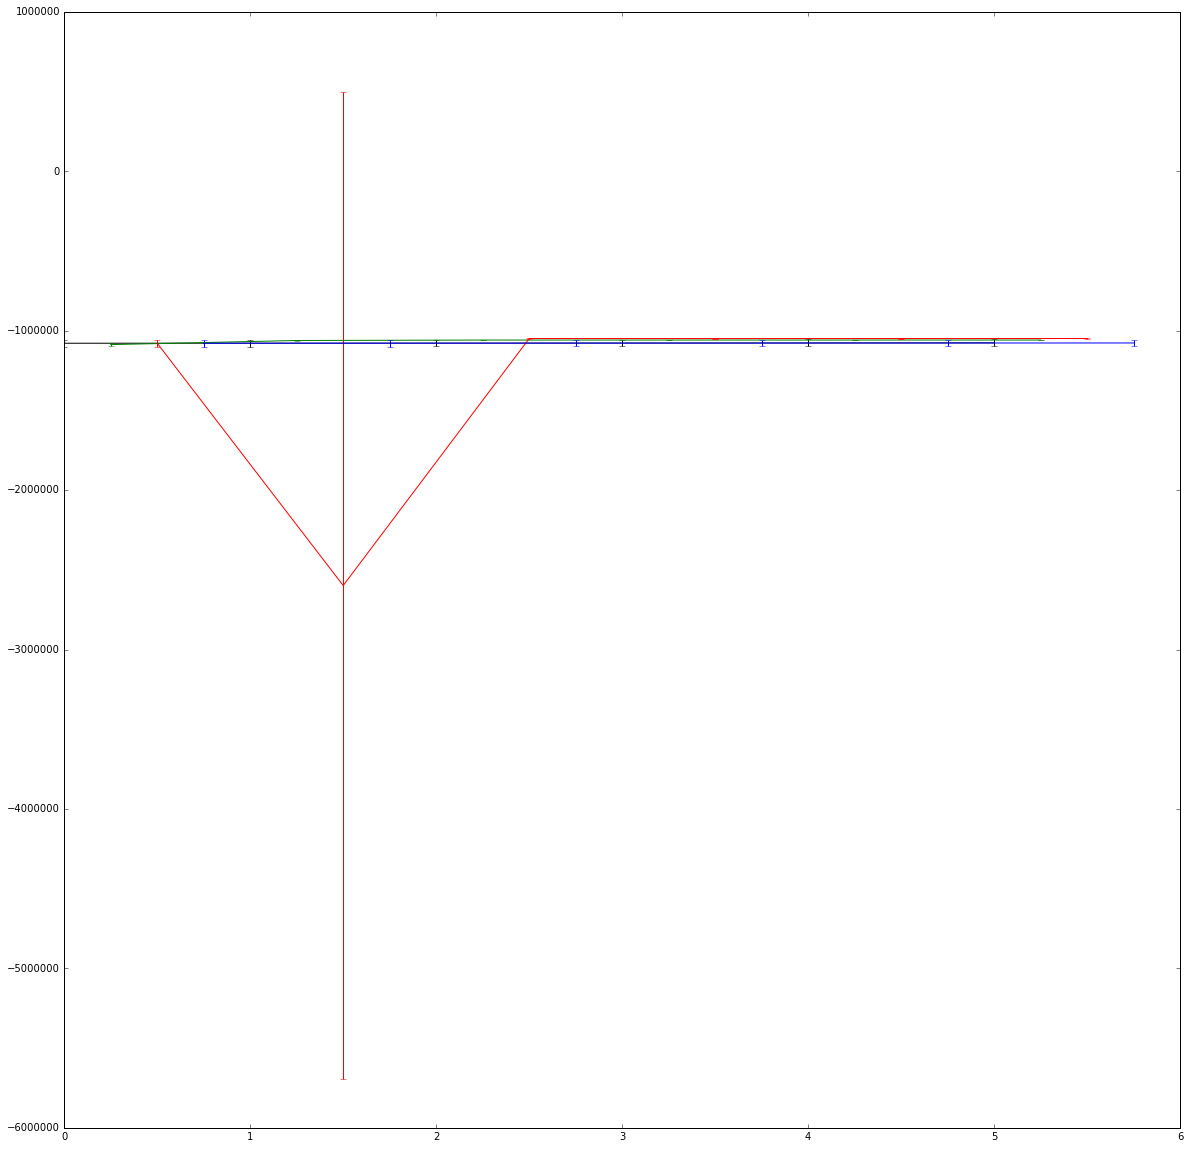

In [8]:
with open('var_results.pckl','rb') as inp:
    Q,accs= cPickle.load(inp)

    id = -1
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    k = label
    id+=1 
    mean, std = np.mean(Q[k], axis=0), np.std(Q[k], axis=0)
    plt.errorbar(np.array(range(len(mean)))+id*1.0/4, mean, yerr=std, c=c, lw=1, label=label)
    

MrMAD [[0.73186507765151354, 0.74338237828718501, 0.73410321999728922, 0.76866893837761907, 0.75764693767280444, 0.76171738883585305], [0.72433433833232741, 0.80056708534104448, 0.73971062853667424, 0.80318345106486999, 0.75800526523955525, 0.78944805550802766], [0.72788800174512247, 0.72949567071196719, 0.71807476160528427, 0.72836990944069036, 0.73790521289943201, 0.74449966076450824], [0.86905605613475712, 0.88963515726330511, 0.90064536033314346, 0.90132581451577565, 0.91923291362153514, 0.90439338399325564], [0.74801903512799306, 0.77950674333357262, 0.75034232611780194, 0.76024587328081794, 0.73260282045824077, 0.75602195689832108]]
[ 0.7602325   0.78851741  0.76857526  0.7923588   0.78107863  0.79121609]
Random [[0.7269866029770472, 1.0214486862555436, 0.74341856637062009, 0.74969100657849008, 0.76002861041053327, 0.74157095276105045], [0.70088794617767913, 0.74382825285431942, 0.74699752779636952, 0.73661732768392574, 0.72046220901308211, 0.72011962757311854], [0.87599233425449

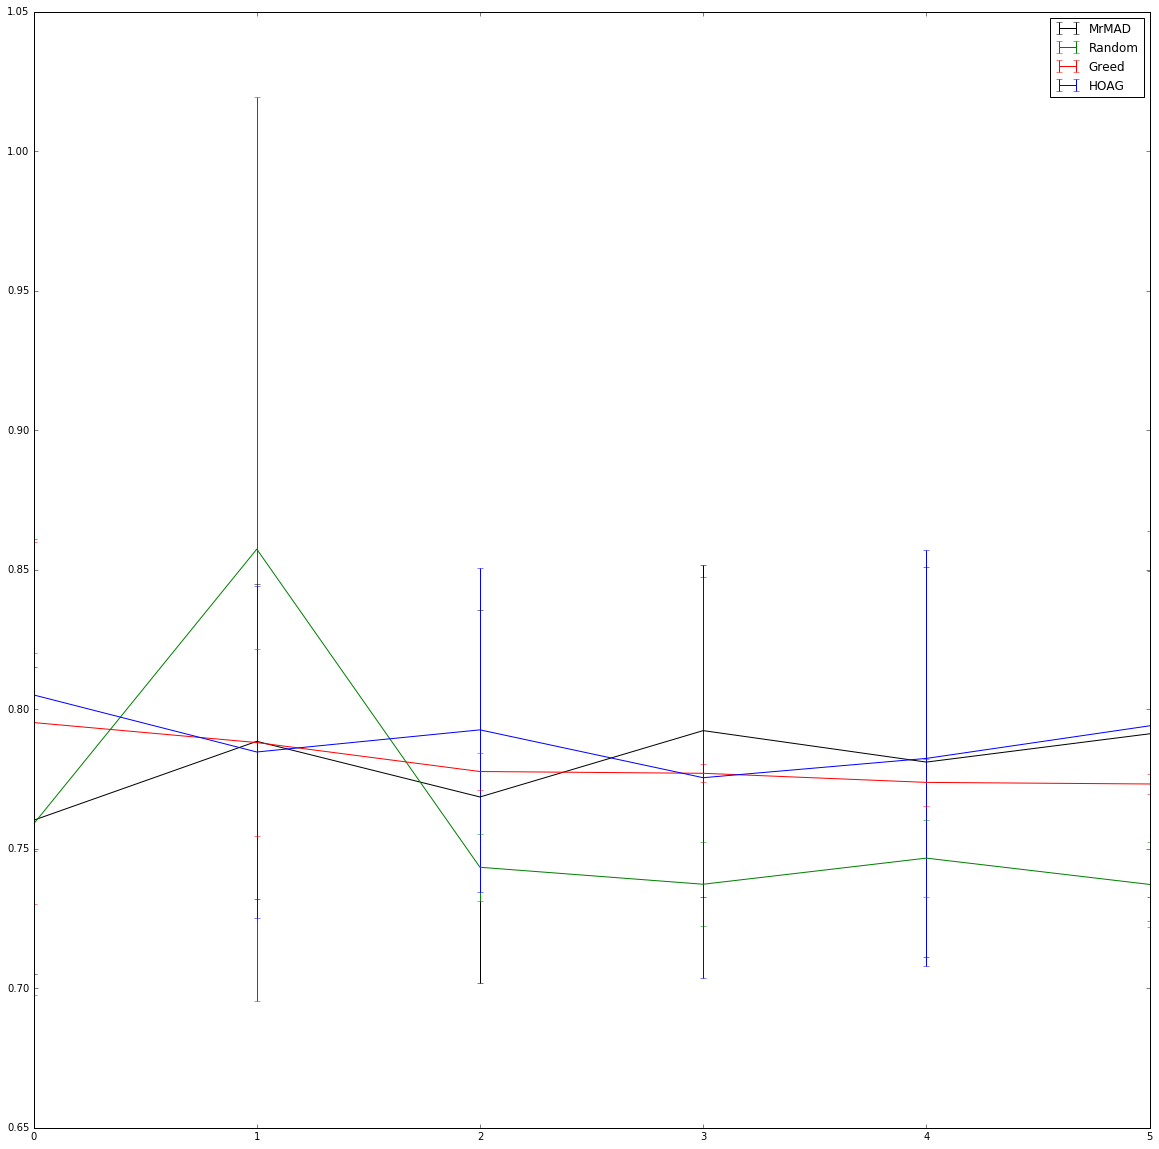

In [7]:
with open('var_results.pckl','rb') as inp:
    Q,accs= cPickle.load(inp)

    id = -1
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    k = label
    id+=1
    
    accs[k] = [[a[0] for a in accsk]   for accsk in accs[k]]
    print k, accs[k]
    #print accs[k]
    mean, std = np.mean(accs[k], axis=0), np.std(accs[k], axis=0)
    print mean
    if len(mean)==5:
        #print label
        mean = mean.tolist()+[mean[4]]
        std = std.tolist()+[std[4]]
    #print mean
    plt.errorbar(np.array(range(len(mean)))+id*0.0/4, mean, yerr=std, c=c, lw=1, label=label)
plt.legend(loc='best')

In [ ]:
batch_size = 25
lr = theano.shared(10**(-5))
log_alphas = theano.shared(np.array([10.0]))

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward,  structure = [X_train.shape[1], 50,   1],  init_sigmas=[0.001]*3,  nonlinearity=lambda x:T.nnet.relu(x), log_alphas=log_alphas, bias=True)
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,   batch_size=batch_size )
model = model_build(params=training_procedure.models[0].params, dataset_size=1)
X = T.matrix()
predict = theano.function([X], model.predict_var(X))

def mse(Y1, Y2):
    return np.sum((Y1 - Y2)**2)

#100 epochs, 2500/25 ~ 100 iterations
err = []
Y = predict(X_test)
err.append(mse(Y[:,0], Y_test))
for epoch in xrange(100):
    
    for i in xrange(100):
        training_procedure.do_train()
    
    Y = predict(X_test)
    err.append(mse(Y[:,0], Y_test))
    

    

In [ ]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        history = []
        for i in xrange(len(b.history)):

            best_value = np.max([h[1] for h in b.history[:i+1]])
            history.append(best_value)
        history = np.array(history)
        history = history[-1]/history
        history = np.where(history>=0.99)[0]
       
        line.append(np.min(history))
        

        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """
    print np.mean(line), np.median(line), np.std(line)

In [ ]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    history = []
    for b in dataset:
        best_value = np.max([h[1] for h in b.history])
        history.append(best_value)
    print label, np.mean(history), np.std(history)

In [ ]:
dataset = hoag
import theano.tensor as T
lr = theano.shared(0.01)
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas =alphas, bias=False)
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )

for d in dataset:
    X_, Y_ = [], []
    for h in d.history:
        alphas.set_value(h[0][0])
        for _ in xrange(10):
              training_procedure.do_train()
        X_.append(np.linalg.norm(training_procedure.models[0].params.eval() - np.array([20, 100])))
        Y_.append(np.linalg.norm(np.exp(h[0][0]- np.array([2713%100, 2713/100]))))
    plt.scatter(np.log(X_),np.log(Y_))
    plt.plot(np.log(X_),np.log(Y_))

In [ ]:
dataset = hoag
import theano.tensor as T
lr = theano.shared(0.01)
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas =alphas, bias=False)
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )

for d in dataset:
    X_, Y_ = [], []
    for h in d.history:
        alphas.set_value(h[0][0])
        for _ in xrange(10):
              training_procedure.do_train()
        X_.append(np.linalg.norm(training_procedure.models[0].params.eval() - np.array([20, 100])))
        Y_.append(h[-1])
    plt.scatter(np.log(X_),np.log(-np.array(Y_)))
    plt.plot(np.log(X_),np.log(-np.array(Y_)))

In [12]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        
        #for i in xrange(len(b.history)):
        track = [h for h in b]
        track = [t-track[0] for t in track]
        best = np.max(track)
        need_value = best*0.99
        track = np.where(track>=need_value)[0]
        line.append(np.min(track))
        #best_value = np.argmax([h[1] for h in b.history])
        #line.append(best_value)
        
        #history = np.array(history)
        
        #history = history[-1]/history
        
        #history = [history[i-1]/history[i] for i in range(1, len(history))]# history#np.where(history>=0.99)[0]
        
        #history = np.where(history>=0.99)[0]
        #line.append(np.min(history))
        

        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """
        
    print np.mean(line), np.std(line)

MrMAD
24.6 0.489897948557
Random
14.2 5.74108003776
Greed
1.0 0.0
HOAG
24.0 0.0


In [4]:
with open('./data/results_cv_mad.pckl', 'rb') as inp:
    cmad = cPickle.load(inp)
with open('./data/results_cv_rand.pckl', 'rb') as inp:
    crand = cPickle.load(inp)    
with open('./data/results_cv_greed.pckl', 'rb') as inp:
    cgreed = cPickle.load(inp)
with open('./data/results_cv_hoag.pckl', 'rb') as inp:
    choag = cPickle.load(inp)

with open('./acc_results_cv_mad.pckl', 'rb') as inp:
    camad = cPickle.load(inp)
with open('./acc_results_cv_rand.pckl', 'rb') as inp:
    carand = cPickle.load(inp)    
with open('./acc_results_cv_greed.pckl', 'rb') as inp:
    cagreed = cPickle.load(inp)
with open('./acc_results_cv_hoag.pckl', 'rb') as inp:
    cahoag = cPickle.load(inp)

#X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
#Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')




DrMAD
([array([ 1.24356163,  9.31000042], dtype=float32)], array(-3810.7227172851562))
DrMAD
([array([ 6.24791527,  4.38121891], dtype=float32)], array(-3762.0437622070312))
DrMAD
([array([-1.81573904, -1.81607676], dtype=float32)], array(-3866.248992919922))
DrMAD
([array([-3.18682933,  8.1264658 ], dtype=float32)], array(-6529.575622558594))
DrMAD
([array([ 4.41561031,  5.91301632], dtype=float32)], array(-3452.843215942383))
DrMAD -3469.07669678
Случайный поиск
([array([ 1.24356163,  9.31000042], dtype=float32)], array(-3912.7228088378906))
Случайный поиск
([array([ 6.24791527,  4.38121891], dtype=float32)], array(-3804.758331298828))
Случайный поиск
([array([-1.81573904, -1.81607676], dtype=float32)], array(-3912.3063354492188))
Случайный поиск
([array([-3.18682933,  8.1264658 ], dtype=float32)], array(-6905.773681640625))
Случайный поиск
([array([ 4.41561031,  5.91301632], dtype=float32)], array(-3689.0042724609375))
Случайный поиск -3236.46327209
Жадный алгоритм
([array([ 1.24356

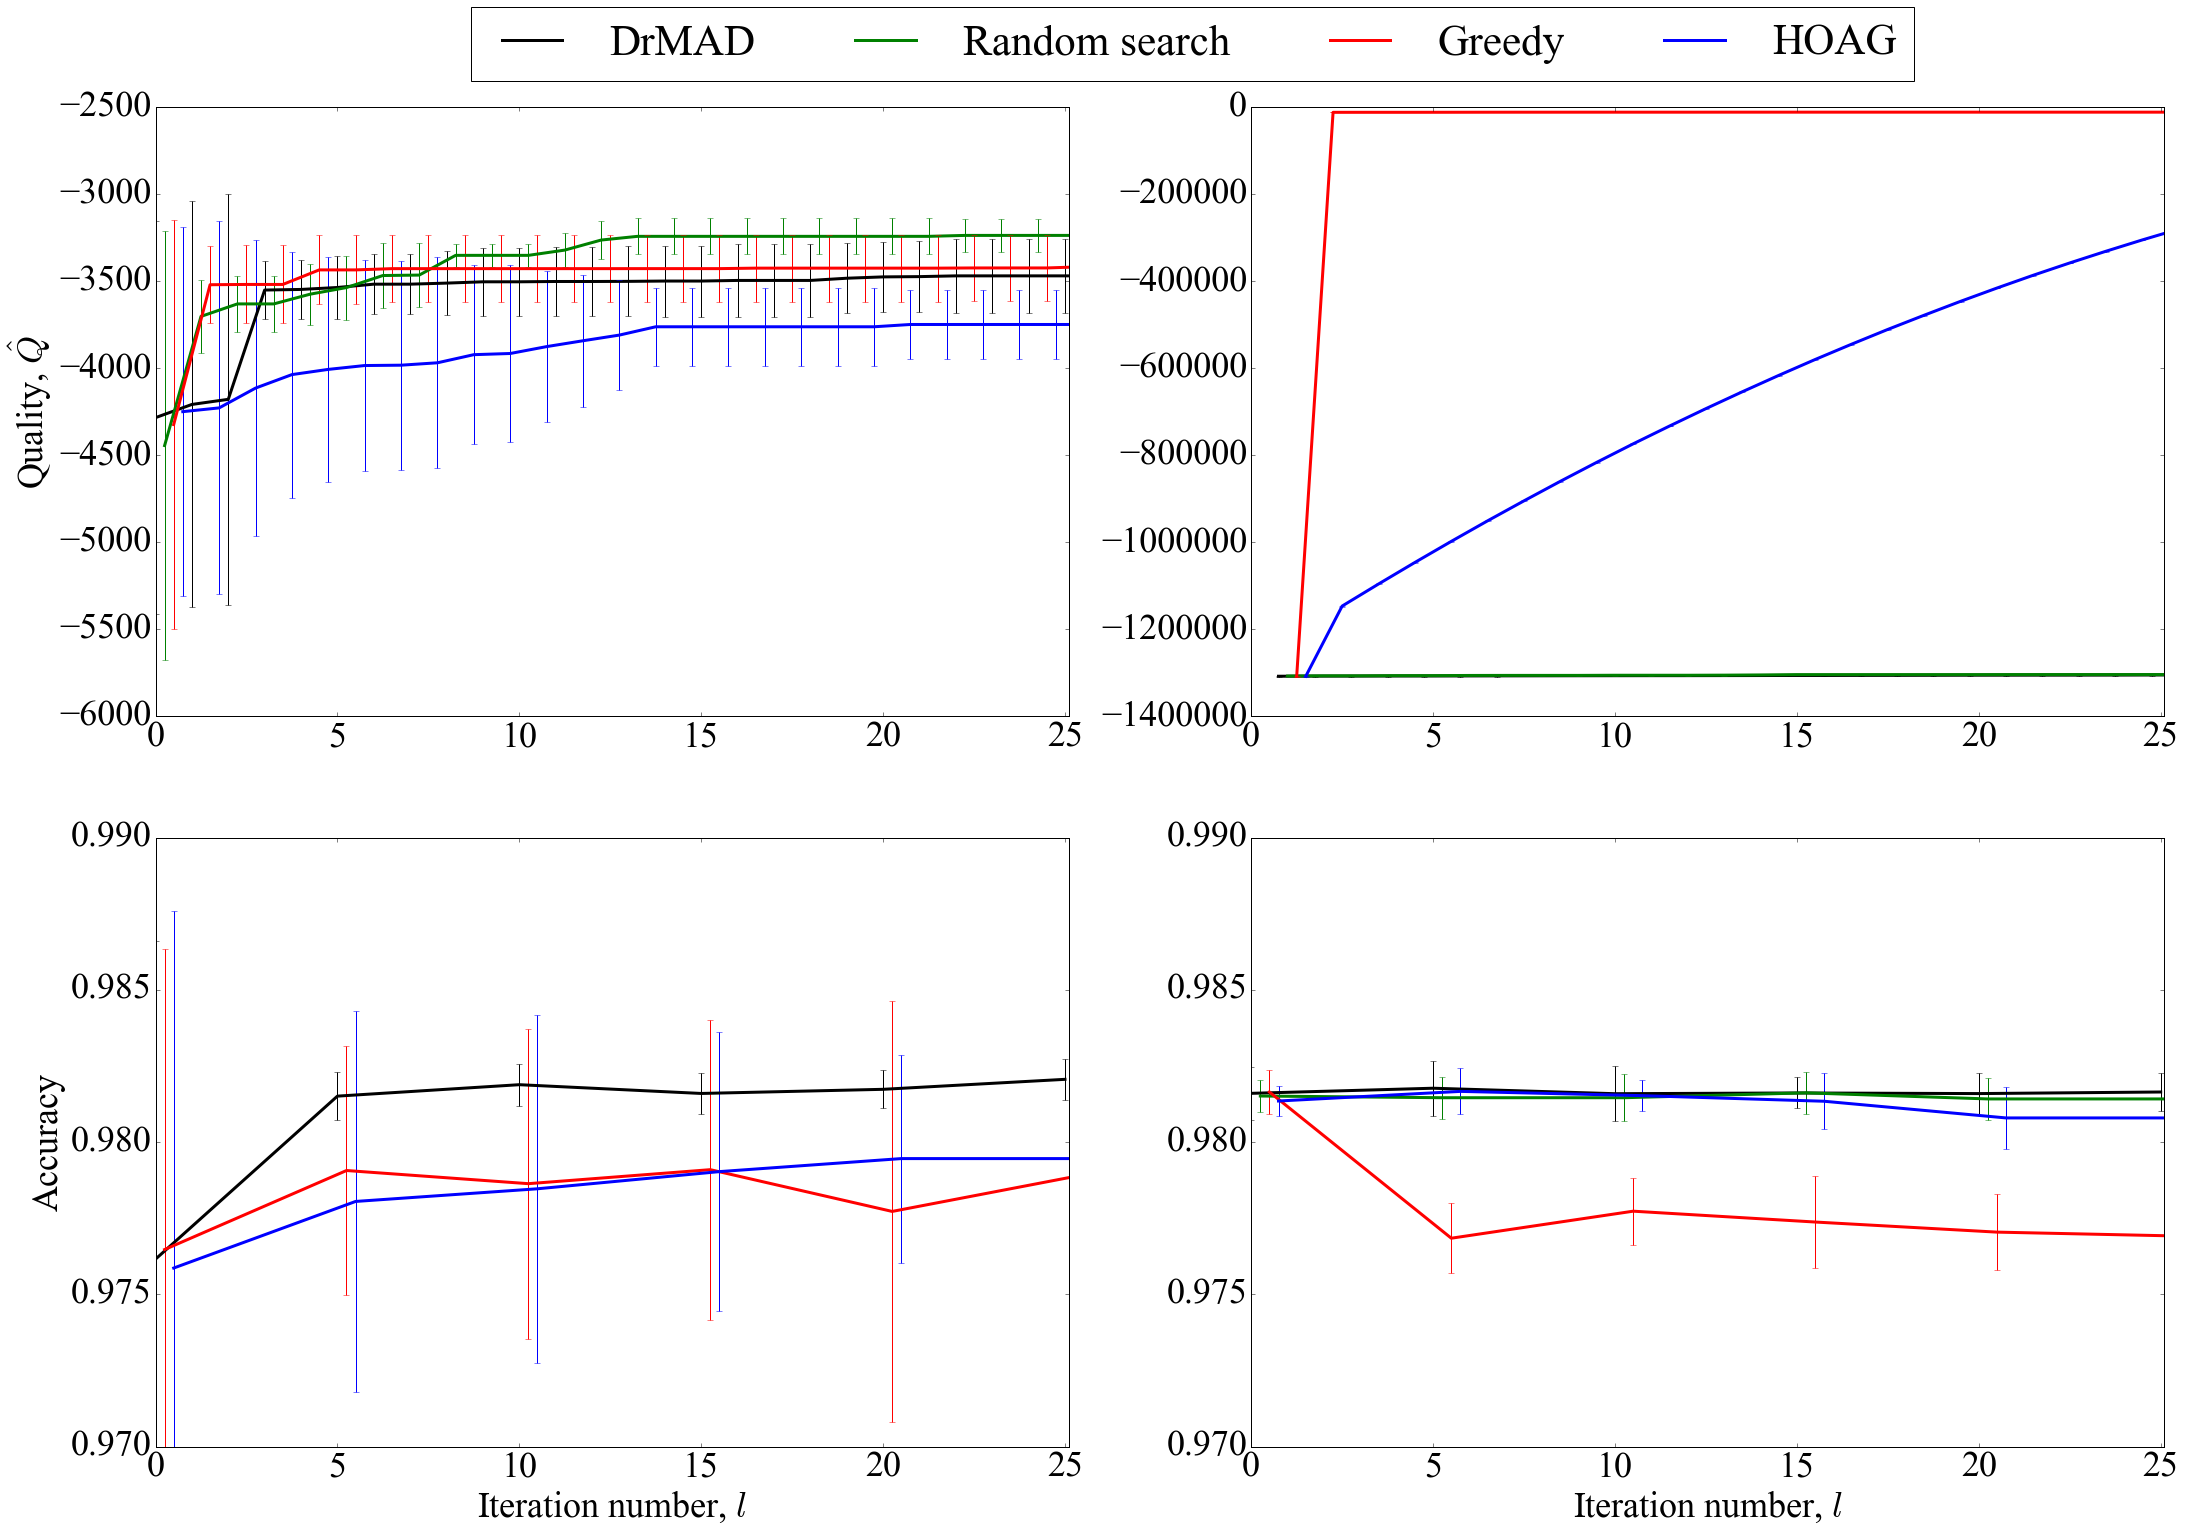

In [5]:
id = -1

font = {'family': 'Times New Roman',
        'weight': 'normal',
       'size':36}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (36, 24)


plt.subplot(221)
for dataset, label, c in [(cmad, 'DrMAD', 'k'), 
                         (crand, u'Случайный поиск', 'g'),
                         (cgreed, u'Жадный алгоритм', 'r'),
                         (choag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    for b in dataset:
        
        print label
        print b.history[0]
        history = []
        
        for i in xrange(0,50):
        
            best_value = max([h[1] for h in b.history[:i+1]])
            
            history.append(best_value)
        line.append(history)
    #plt.xlabel(u'Количество итераций', fontsize=30)
    plt.ylabel(u'Quality, $\hat{Q}$', fontsize=36)
    print label,   np.mean(np.array(line)[:,-1])
    #print np.mean(line, axis=0)[-1]
    
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    plt.errorbar(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0),  c=c, lw=3, label=label)
plt.xlim((0,25.1))

plt.subplot(223)
plt.xlabel(u'Iteration number, $l$', fontsize=36)
plt.ylabel(u'Accuracy', fontsize=36)
id = -1

for dataset,label, label2,  c in [(camad, 'MrMAD', 'DrMAD', 'k'), 
                         (carand, 'Random', u'Random search', 'g'),
                         (cagreed,'Greed',  u'Greedy', 'r'),
                         (cahoag, 'HOAG', 'HOAG', 'b')
                          ]:
    
    k = label
    id+=1
    dataset = 1.0- np.array(dataset)
    
    #print accs[k]
    mean, std = np.mean(dataset, axis=0), np.std(dataset, axis=0)
    
    if len(mean)==5:
        #print label
        mean = mean.tolist()+[mean[4]]
        std = std.tolist()+[std[4]]
    print label,  mean
   
    
    plt.errorbar(np.array(range(len(mean)))*5+id*1.0/4, mean, yerr=std, c=c, lw=1)
    plt.plot(np.array(range(len(mean)))*5+id*1.0/4, mean,  c=c, lw=3, label=label2)
#plt.legend(loc='best')
plt.xlim((0,25.1))
plt.ylim((0.97, 0.99))
#plt.legend(loc='best', bbox_to_anchor=(1.0,0.75))


plt.subplot(222)
for dataset, label, c in [(mad, 'DrMAD', 'k'), 
                         (rand, u'Случайный поиск', 'g'),
                         (greed, u'Жадный алгоритм', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    for b in dataset:
      
        history = []
        
        for i in xrange(0,50):
        
            best_value = max([h for h in b[:i+1]])
            
            history.append(best_value)
        line.append(history)
    #plt.xlabel(u'Количество итераций', fontsize=30)
    #plt.ylabel(u'Наилучшее значение Q', fontsize=30)
    print label,   np.mean(np.array(line)[:,-1])
    #print np.mean(line, axis=0)[-1]
    
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    plt.errorbar(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0),  c=c, lw=3, label=label)
plt.xlim((0,25.1))
plt.subplot(224)
plt.xlabel(u'Iteration number, $l$', fontsize=36)
#plt.ylabel(u'RMSE', fontsize=30)
id = -1

for dataset,label, label2,  c in [(amad, 'MrMAD', 'DrMAD', 'k'), 
                         (arand, 'Random', u'Random search', 'g'),
                         (agreed,'Greed',  u'Greedy', 'r'),
                         (ahoag, 'HOAG', 'HOAG', 'b')
                          ]:
    
    k = label
    id+=1
    dataset = 1.0- np.array(dataset)
    #print accs[k]
    mean, std = np.mean(dataset, axis=0), np.std(dataset, axis=0)
    
    if len(mean)==5:
        #print label
        mean = mean.tolist()+[mean[4]]
        std = std.tolist()+[std[4]]
    print label,  mean
   
    if label == 'MrMAD':
        mean+=0.0001
    plt.errorbar(np.array(range(len(mean)))*5+id*1.0/4, mean, yerr=std, c=c, lw=1)
    plt.plot(np.array(range(len(mean)))*5+id*1.0/4, mean,  c=c, lw=3, label=label2)
#plt.legend(loc='best')
plt.xlim((0,25.1))
plt.ylim((0.97, 0.99))
plt.legend(loc='best', bbox_to_anchor=(0.75,2.4),  ncol=4)

plt.savefig('../../../doc/plots/mnist.eps', bbox_inches='tight')

In [36]:
mean

array([ 1308434.86101074,  1147012.90096436,  1096292.23201904,
        1046690.91679687,   998237.59156494,   950911.64278564,
         904965.03765869,   860023.05682373,   816386.24241943,
         773942.5496582 ,   732959.74354248,   692934.14880371,
         654197.64692383,   616559.58359375,   580046.87770996,
         544891.83620605,   510784.13613281,   478096.66242676,
         446176.54350586,   415621.27467041,   386132.22888184,
         357928.37333984,   330887.58710937,   304862.31965332,
         280062.6199707 ])